In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Recurrence and transience of $d$-dimensional random walks

## The 2-dimensional random walk
The following code simulates a 2-dimensional random walk with different probabilities to go N,S,E,W. You can play with these parameters and check that the Simple Random Walk (SRW) is quite different.

In [2]:
# probabilities for your 
# 2D random walk

[p_N,p_S,p_E,p_W] = [1/4,1/4,1/4,1/4] # = [1/4,1/4,1/4,1/4] for the SRW

# number of steps of the walk
n_steps = 100000

# starting point
start = [0,0]

# run the walk
x = [start[0]]
y = [start[1]]
counter = 1
while counter < n_steps:
    U = np.random.rand()
    if 0 < U <= p_N:
        # going north
        x.append(x[-1] + 1) 
        y.append(y[-1])
    elif p_N < U <= p_N + p_S:
        # going south
        x.append(x[-1] - 1) 
        y.append(y[-1])
    elif p_N + p_S < U <= p_N + p_S+ p_E:
        # going east
        x.append(x[-1])
        y.append(y[-1]+1)
    else:
        # going west
        x.append(x[-1])
        y.append(y[-1]-1)
    counter += 1


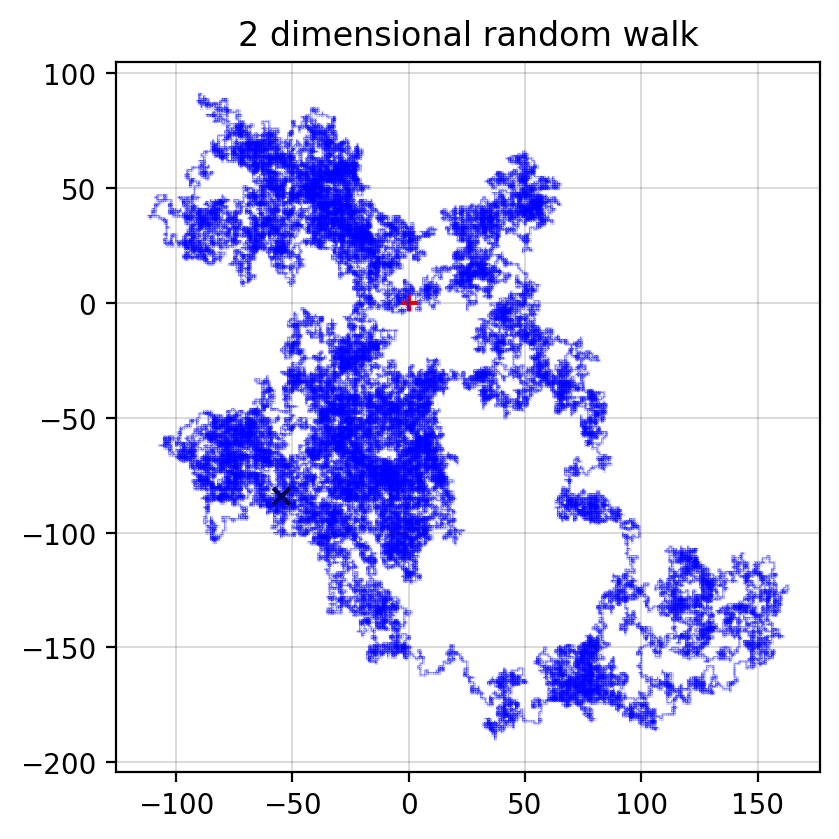

In [3]:
# Plot the 2D-path
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(111)
plt.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(y, x,c='blue',alpha=0.25,s=0.05);
ax.plot(y, x,c='blue',alpha=0.5,lw=0.25,ls='-');
ax.scatter(y[0], x[0],c='red', marker='+')
ax.scatter(y[-1], x[-1],c='black', marker='x')
plt.title('2 dimensional random walk')
plt.tight_layout(pad=0)

## The 3-dimensional random walk

In [4]:
# 3D random walk 

# The walk is always transient
# in 3D except if transitions 
# probability are such that the 
# walk is in fact 
# only in 2D or 1D 
### Thus, we only look at SRW in 3D ###

# number of steps
n_steps = 10**3

# starting point
start = [0,0,0]

# run the walk
x = [start[0]]
y = [start[1]]
z = [start[2]]

counter = 1
while counter < n_steps:
    # choose a random direction  
    vec = np.random.randint(1,4)
    orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
    if vec ==1:
        x.append(x[-1]+orient)
        y.append(y[-1])
        z.append(z[-1])
    if vec ==2:
        x.append(x[-1])
        y.append(y[-1]+orient)
        z.append(z[-1])
    else:
        x.append(x[-1])
        y.append(y[-1])
        z.append(z[-1]+orient)
    counter += 1

In [5]:
# Plotting the simulations
fig = plt.figure(figsize=(4,4),dpi=200)
ax = plt.axes(projection='3d')
ax.plot3D(z, y, x, 'blue')
ax.scatter(z[0],y[0], x[0],c='red', marker='+')
ax.scatter(z[-1],y[-1], x[-1],c='black', marker='x')
plt.title('3 dimensional random walk')

ValueError: Unknown projection '3d'

<Figure size 800x800 with 0 Axes>

Hereafter is a function which allows you to compute the number of visits to zero for the three dimensional random walks.

In [6]:
def visits_to_zero_3d(n_simulations,n_steps):
    hist = {1:0} # Initialize the histogram as a dictionnary
    for i in range(n_simulations):
        # number of steps

        # starting point
        start = [0,0,0]

        # run the walk
        x = [start[0]]
        y = [start[1]]
        z = [start[2]]
        zero_count = 1 #you start at one so get +1 for free
        for j in range(n_steps):
            # choose a random direction  
            vec = np.random.randint(1,4)
            orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
            if vec ==1: #choose a direction and then an orientation
                x.append(x[-1]+orient)
                y.append(y[-1])
                z.append(z[-1])
            if vec ==2:
                x.append(x[-1])
                y.append(y[-1]+orient)
                z.append(z[-1])
            else:
                x.append(x[-1])
                y.append(y[-1])
                z.append(z[-1]+orient)  
            zero_count += (x[-1]==y[-1]==z[-1]==0)
        if zero_count in hist:
                hist[zero_count] += 1
        else:
                hist[zero_count] = 1
    return hist

{1: 670, 2: 217, 3: 75, 5: 8, 4: 28, 6: 2}
the probability of returning at some time t>0 to zero p_0 is approximately  0.33


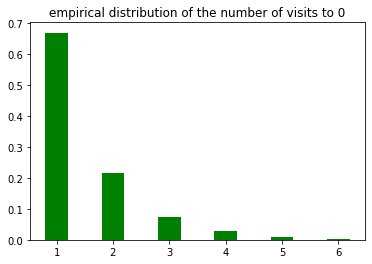

In [7]:
# Plotting the result of the function

n_simulations =10**3
n_steps=10**4

# Get the histogram
# and renormalize the probability distribution
hist = visits_to_zero_3d(n_simulations,n_steps)
print(hist)
total = sum(hist.values())
factor = 1/total

normalized_hist =  {key:value*factor for key,value in hist.items()}

return_proba = (n_simulations - hist[1])/n_simulations
print("the probability of returning at some time t>0 to zero p_0 is approximately ", return_proba)
plt.title('empirical distribution of the number of visits to 0')
plt.bar(list(normalized_hist.keys()), normalized_hist.values(), color='g', width=0.4)
plt.show()

It was shown a bit miraculously in 1992 by Borwein and Zucker that the mean of the expected number of returns to 0 (that we write $N_0$) for the SRW in 3 dimensions could be also be computed exactly. The formula is as follows:
\begin{align*}
        \mathbb{E}(N_0) = \frac{\sqrt3 -1}{32 \pi^3}\left[\Gamma(\frac{1}{24})\Gamma(\frac{11}{24})\right]^2 \simeq 1.516386...
\end{align*}
Where $\Gamma$ is the Euler gamma function.
This formula is very surprising and also very hard to prove and is only given here because it is remarkable. Of course, you do not have to remember it. However it allows to check if the empirical probability of returning to 0 is close to the theoretical one. Since we know from the lectures that 
\begin{align*}
    \mathbb{E}(N_0) = \frac{1}{1-p_0}.
\end{align*}
And thus that the return probability to 0 starting from 0, $p_0$, has approximate value
\begin{equation*}
    p_0 = 1-\frac{1}{\mathbb{E}(N_0)} \simeq  1-\frac{1}{1.516386} \simeq 0.34.
\end{equation*}

For 
n_simulations =10^3
n_steps=10^4, I obtained with the above program $p^{exp}_0 \simeq 0.339$ which is in accordance with the theory.